In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


Asama 1 
kutuphaneleri import etme


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


Asama 2 
veri seti yukleme ve veri seti uzerinde bilgi alma

In [ ]:
df = pd.read_csv('/content/driver/MyDrive/For Keras/heart_statlog_cleveland_hungary_final.csv') #/content/driver/MyDrive/For Keras/diabetes.csv

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
df.head()

age  sex  chest pain type  ...  oldpeak  ST slope  target
0   40    1                2  ...      0.0         1       0
1   49    0                3  ...      1.0         2       1
2   37    1                2  ...      0.0         1       0
3   48    0                4  ...      1.5         2       1
4   54    1                3  ...      0.0         1       0

[5 rows x 12 columns]

In [ ]:
print(df.describe())

               age          sex  ...     ST slope       target
count  1190.000000  1190.000000  ...  1190.000000  1190.000000
mean     53.720168     0.763866  ...     1.624370     0.528571
std       9.358203     0.424884  ...     0.610459     0.499393
min      28.000000     0.000000  ...     0.000000     0.000000
25%      47.000000     1.000000  ...     1.000000     0.000000
50%      54.000000     1.000000  ...     2.000000     1.000000
75%      60.000000     1.000000  ...     2.000000     1.000000
max      77.000000     1.000000  ...     3.000000     1.000000

[8 rows x 12 columns]


0 ile 1 olanlarin oranini

In [ ]:
df.target.value_counts()

1    629
0    561
Name: target, dtype: int64

Asama 3 Veri seti x ve y'yi ayrima ve normalizasiyon islemi 

In [ ]:
x = df.drop('target',axis=1)
y = df.target.values;
x=x = ((x-np.min(x))/(np.max(x)-np.min(x))).values


Asama 4 Test Train 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print('x ',x_train.shape)
print('y',y_train.shape)

x  (952, 11)
y (952,)


Asama 5 MLPClassifier NN uygulamasi 

In [ ]:
mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(12,2),(5,3),(100,100)],
            "solver":["adam","sgd","lbfgs"]}

mlpc=MLPClassifier(activation='logistic',max_iter=400,random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=8,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 8 folds for each of 36 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  4.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(mlpc_cv_model.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}


In [ ]:
mlpc=MLPClassifier(activation='logistic',random_state=1,max_iter=400,alpha= 0.0001,hidden_layer_sizes=(100,100), solver='lbfgs')
mlpc.fit(x_train,y_train)
print(mlpc.score(x_test,y_test))

0.9159663865546218


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Asam 6 Degerlendirme


In [ ]:
y_pred = mlpc.predict(x_test) # modelin tahminleri y_pred deiskene atma 


In [ ]:
acc=metrics.accuracy_score(y_test,y_pred) # accuracy degeri
print("Accuracy:",acc)

Accuracy: 0.9159663865546218


In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred) #cm matrix
print(cm)

[[105   6]
 [ 14 113]]


In [ ]:
f1=metrics.f1_score(y_test,y_pred) #f1 score 
print("f1 score:",f1)

f1 score: 0.9186991869918699


In [ ]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       111
           1       0.95      0.89      0.92       127

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



In [ ]:
#roc and auc
probs=mlpc.predict_proba(x_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

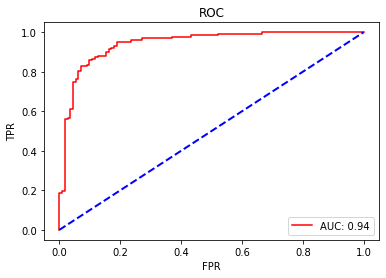

In [ ]:
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

Seaborn kullanmasi

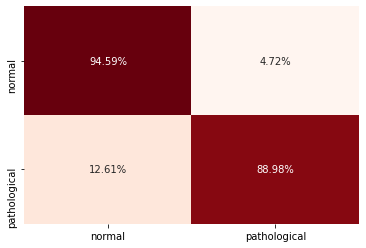

In [ ]:
class_adlari=["normal","pathological"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Reds",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

Asama 7 Keras Uygulamasi

In [ ]:
model1=Sequential()

model1.add(Dense(11,input_dim=11,activation="sigmoid"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation="relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation="relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation="relu"))
model1.add(BatchNormalization())

model1.add(Dense(1,kernel_initializer='normal',activation="sigmoid"))

model.add(Flatten())

model1.compile( optimizer='adam',loss="binary_crossentropy",       
              metrics=['accuracy'])  

In [ ]:
egitim=model1.fit(x_train,y_train,epochs=200)
scores = model1.evaluate(x_test, y_test)
print("For model 1")
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

Epoch 1/200
30/30 [==============================] - 1s 3ms/step - loss: 0.5326 - accuracy: 0.7285
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.8401
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8429
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8576
Epoch 5/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8725
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8673
Epoch 7/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3086 - accuracy: 0.8655
Epoch 8/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8779
Epoch 9/200
30/30 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.8737
Epoch 10/200
30/30 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.8975
Epoch 11/

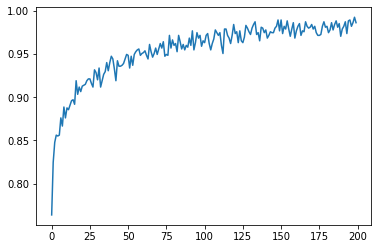

In [ ]:
plt.plot(egitim.history["accuracy"])
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred)
y_true=np.argmax(y_test)
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

TypeError: ignored

In [1]:
kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=1)
model = Sequential()
cvscores = []

for train, test in kfold.split(x, y):

  model.add(Dense(11,input_dim=11,activation="sigmoid"))
  model.add(BatchNormalization())

  model.add(Dense(128,activation="relu"))
  model.add(BatchNormalization())

  model.add(Dense(128,activation="relu"))
  model.add(BatchNormalization())

  model.add(Dense(128,activation="relu"))
  model.add(BatchNormalization())

  model.add(Dense(1,kernel_initializer='normal',activation="sigmoid"))
  
  model.compile( optimizer='adam',loss="binary_crossentropy",       
              metrics=['accuracy']) 
  model.fit(x[train], y[train], epochs=200, verbose=0)
  scores = model.evaluate(x[test], y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

NameError: ignored

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("for model 2")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

for model 2
accuracy: 98.32%


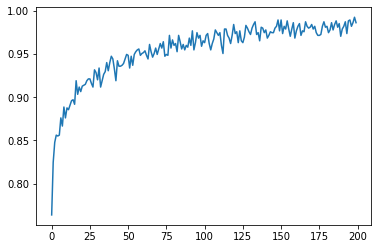

In [ ]:
plt.plot(egitim.history["accuracy"])
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred)
y_true=np.argmax(y_test)
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

TypeError: ignored